ROSENBROCK TEST PROBLEM
======================



INTRODUCTION
-----------

Rosenbrock function is a non-convex function used as a performance test problem for optimization algorithms.

$f(x,y)=(a-x)^{2}+b(y-x^{2})^{2}$

The global minimum is inside a long, narrow, parabolic shaped flat valley. To find the valley is trivial and using analytical solution $(x,y)=(1,1)$ can be obtained straightforwardly by partial differentiation,

$f_{x} = −2+2x−200x(y−x^2) = 0 $


$f_{y} = 200(y–x^2)=0.$

The numerical solution, however, poses a particular challenge.


[Here](https://plot.ly/~pntokop/18/rosenbrock-function-3d-surface/#plot) is a plot for the Rosenbrock function $ f(x,y)=(1-x)^{2}+100(y-x^{2})^{2}$. Explore the function using mouse and various others features provided by Plotly.

Here is a small snippet of code that uses `MatplotLib` to visualize the functions.



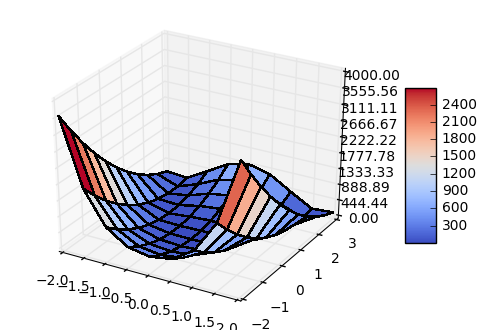

In [43]:
def rosenbrock(x,y):
      return (1-x)**2 + 100* ((y-x**2))**2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plot
import numpy as np

fig = plot.figure()
ax = fig.gca(projection='3d')

s = 0.5   
X = np.arange(-2, 2.+s, s)   
Y = np.arange(-2, 3.+s, s)   
    
#Create the mesh grid(s) for all X/Y combos.
X, Y = np.meshgrid(X, Y)

#Rosenbrock function w/ two parameters using numpy Arrays
Z = (1.-X)**2 + 100.*(Y-X*X)**2

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
         linewidth=1.0, antialiased=False)  

 
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

#Displays the figure, handles user interface, returns when user closes window
plot.show()

We have evaluated the Function using the following optimizers currently avalible in OPENmdao.
* SLSQP
* TNC 
* COBYLA


SETTING THE PROBLEM IN OPENMDAO
-------------------



In [26]:
from __future__ import print_function
from openmdao.api import ScipyOptimizer
from openmdao.api import IndepVarComp, Component, Problem, Group

class Rosenbrock(Component):
    """ Evaluates the equation f(x,y) = (1.0-x)**2 + 100*(y-x**2)**2 """

    def __init__(self):
        super(Rosenbrock, self).__init__()

        self.add_param('x', val=0.0)
        self.add_param('y', val=0.0)

        self.add_output('f_xy', shape=1)

    def solve_nonlinear(self, params, unknowns, resids):
        """f(x,y) = (1.0-x)**2 + 100*(y-x**2)**2  """

        x = params['x']
        y = params['y']

        unknowns['f_xy'] = (1.0-x)**2 + 100*(y-x**2)**2

    #def linearize(self, params, unknowns, resids):
     #   """ Jacobian for our Rosenbrock."""

       #x = params['x']
       #y = params['y']
       #J = {}

       #J['f_xy', 'x'] = -2 + 2*x - 400*x*y + 400*x**3
       #J['f_xy', 'y'] = 200*y - 200*x**2
       #return J

if __name__ == "__main__":

   
# Initial value of x and y set in the IndepVarComp.
	top = Problem()
	root = top.root = Group()
	
	root.deriv_options['type'] = 'fd'	
	
   	root.add('p1', IndepVarComp('x', 13.0))
	root.add('p2', IndepVarComp('y', -14.0))
	root.add('p', Rosenbrock())

	root.connect('p1.x', 'p.x')
	root.connect('p2.y', 'p.y')

	

	top.driver = ScipyOptimizer()
	top.driver.options['optimizer'] = 'SLSQP'
    #'Nelder-Mead', 'Powell', 'CG', 'BFGS', 
    #'Newton-CG', 'L-BFGS-B', 'TNC', 'COBYLA', 'SLSQP' can also be tried
    # Each of them have there own parameters
   

	top.driver.add_desvar('p1.x', lower=-50, upper=50)
	top.driver.add_desvar('p2.y', lower=-50, upper=50)
	top.driver.add_objective('p.f_xy')

	top.setup()

	# You can also specify initial values post-setup
	top['p1.x'] = 5.0
	top['p2.y'] = -6.0
	
	top.run()

print('\n')
print('Minimum of %f found at (%f, %f)' % (top['p.f_xy'], top['p.x'], top['p.y']))

##############################################
Setup: Checking root problem for potential issues...

No recorders have been specified, so no data will be saved.

Setup: Check of root problem complete.
##############################################

Optimization terminated successfully.    (Exit mode 0)
            Current function value: [  9.88299292e-08]
            Iterations: 34
            Function evaluations: 43
            Gradient evaluations: 34
Optimization Complete
-----------------------------------


Minimum of 0.000000 found at (0.999686, 0.999371)
